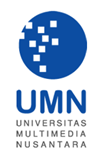
<center>
    <h3>UJIAN TENGAH SEMESTER GENAP TAHUN AKADEMIK 2023/2024</h3>
    <h3>PROGRAM STUDI INFORMATIKA</h3>
    <h3>FAKULTAS TEKNIK DAN INFORMATIKA</h3>
    <h3>UNIVERSITAS MULTIMEDIA NUSANTARA</h3>
</center>

---

<b>Petunjuk:</b>
<ul>
    <li>Gunakan file template jawaban UTS ini untuk <b>SOAL B</b></li>
    <li>Setiap butir pertanyaan memiliki bobot penilaiannya masing-masing</li>
    <li>Usahakan untuk mengerjakan setiap butir pertanyaan sesuai dengan perintah yang diberikan dan di tempat yang disediakan</li>
    <li>Tulis nama dan NIM Anda di dalam blok <i>cell</i> di bawah ini! Tampilkan dengan perintah <i>print</i>!</li>
</ul>

In [46]:
# input nama dan nim Anda di sini
nama = 'Reinhard Javera Maheswara'
nim = '00000077732'
print(f'Nama:\n  {nama}')
print(f'NIM:\n  {nim}')

Nama:
  Reinhard Javera Maheswara
NIM:
  00000077732


<u><h3>SOAL 1 (Total Bobot: 20%)</h3></u>
Gunakan metode Gauss-Seidel (metode iterative) untuk mendapatkan solusi dari sistem persamaan linear berikut dengan nilai threshold $𝜖=0.0001$:<br>
$ 3𝑥_1+𝑥_2−2𝑥_3=2 $<br>
$ −2𝑥_1−9𝑥_2-7𝑥_3=5 $<br>
$ 𝑥_1+𝑥_2+7x_3=−3 $<br>
Jangan lupa untuk mengecek kondisi kekonvergenan terlebih dahulu dengan melihat apakah matriks dominan secara diagonal atau tidak?

In [47]:
# check convergence condition - diagonally dominance (Bobot maks: 5%)

# import seluruh libraries yang dibutuhkan
import numpy as np

# INPUT THE MATRIX
a = [[3, 1, -2],[-2, -9, -7], [1, 1, 7]]

# Find diagonal coefficients
diagonal = np.diagonal(np.abs(a))

# Find row sum without diagonal
notDiagonal = np.sum(np.abs(a), axis=1) - diagonal

# Check the condition
if np.all(2 * diagonal >= notDiagonal):
    print('Matrix is diagonally dominant')
else:
    print('Matrix is not diagonally dominant')




Matrix is diagonally dominant


In [48]:
# Gauss-Seidel iterative method (Bobot maks: 15%)

import numpy as np

def gaussSeidel(A, b, x_init, tol):
  n = len(b)
  x = x_init.copy()
  iterations = 0
  error = np.inf

  while error > tol:
    x_old = x.copy()
    for i in range(n):
      sum_left = sum(A[i, j] * x[j] for j in range(i))
      sum_right = sum(A[i, j] * x_old[j] for j in range(i+1, n))
      x[i] = (b[i] - sum_left - sum_right) / A[i, i]
    
    error = np.linalg.norm(x - x_old)
    iterations += 1

  return x, iterations

# inisialisasi data awal
x1 = 0
x2 = 0
x3 = 0
epsilon = 0.0001
converged = False
x_old = np.array([x1, x2, x3])
A = np.array([[3,1,-2],
              [-2,-9,-7],
              [1,1,7]])
B = np.array([2,5,-3])

# initial guess
x_init = np.zeros(3)

# nilai threshold
tol = 0.0001

x, iterations = gaussSeidel(A, b, x_init, tol)

print("Solution:", x)
print("Number of iterations:", iterations)

# metode Gauss-Seidel
print('\nIteration Results')
print(' k,  x1,   x2,   x3  ')
for k in range(1, 50):
  x1 = (2-1*x2+2*x3)/3
  x2 = (5+2*x1+7*x3)/(-9)
  x3 = (-3-1*x1-1*x2)/7
  x = np.array([x1,x2,x3])

  dx = np.sqrt(np.dot(x-x_old, x-x_old))

  print("%d, %.4f, %.4f, %.4f"%(k, x1, x2, x3))
  if dx < epsilon:
    converged = True
    print("Converged")
    break

  x_old = x

if not converged:
  print('Not converge, increase the # of iterations')

Solution: [ 0.46857312 -0.30856882 -0.45142919]
Number of iterations: 8

Iteration Results
 k,  x1,   x2,   x3  
1, 0.6667, -0.7037, -0.4233
2, 0.6190, -0.3639, -0.4650
3, 0.4780, -0.3001, -0.4540
4, 0.4640, -0.3056, -0.4512
5, 0.4677, -0.3086, -0.4513
6, 0.4686, -0.3087, -0.4514
7, 0.4686, -0.3086, -0.4514
8, 0.4686, -0.3086, -0.4514
Converged


<u><h3>SOAL 2 (Total Bobot: 20%)</h3></u>
<h3>Soal 2 A (Bobot: 10%)</h3>
Carilah nilai eigen dan vektor eigen untuk matrix
$$\begin{bmatrix} 1 & 2 & 1 \\ 1 & 3 & 2 \\ 1 & 4 & 2 \end{bmatrix}$$
dengan menggunakan Power method. Anda bisa mencoba dengan vektor awal [1, 0, 0] dan 10 kali iterasi.

In [49]:
# Finding max Eigenvalue and Eigenvector (Bobot maks: 10%)

import numpy as np

# define a normalize function
def normalize(x):
    fac = abs(x).max()
    x_n = x / fac
    return fac, x_n
    
# inisialisasi data awal
A = np.array([[1, 2, 1], [1, 3, 2], [1, 4, 2]])

# inisialisasi initial vector
v = np.array([1, 0, 0])

# Define the power method function
def eigenPowerMethod(initial_vector, matrix, max_iter):
    for i in range(max_iter):
        initial_vector = matrix @ initial_vector
        lambda_1, initial_vector = normalize(initial_vector)
    return lambda_1, initial_vector

# eigenvalue and eigenvector
eigenValue, eigenVector = eigenPowerMethod(v, A, 10)
print("Largest eigenvalue:", eigenValue)
print("Eigenvector:", eigenVector)


Largest eigenvalue: 5.97196076888784
Eigenvector: [0.54568746 0.85656833 1.        ]


<h3>Soal 2 B (Bobot: 10%)</h3>
Carilah seluruh nilai eigen dan vektor eigen untuk permasalahan di Soal 2 A dengan menggunakan <i>built-in function</i> <b>eig</b> dari numpy.linalg!

In [50]:
# Finding all eigenvalues and eigenvectors using built-in function eig (Bobot maks: 10%)

# import seluruh libraries yang dibutuhkan
import numpy as np

# tampilkan seluruh eigenvalues dan eigenvectors dengan fungsi 'eig'
eigenValues, eigenVectors = np.linalg.eig(A)

print("Nilai eigen: ", eigenValues)
print("Vektor eigen: ", eigenVectors)

Nilai eigen:  [ 5.97196077  0.42346527 -0.39542603]
Vektor eigen:  [[-0.38285759 -0.93567397  0.18171141]
 [-0.60097347  0.10061581 -0.53826044]
 [-0.70160599  0.33821692  0.82295605]]


<u><h3>SOAL 3 (Total Bobot: 20%)</h3></u>
Misal diberikan data buatan yang diperoleh dengan formulasi $ 𝑥=𝑛𝑝.𝑙𝑖𝑛𝑠𝑝𝑎𝑐𝑒(0, 1, 101) $ dan $ 𝑦=15*𝑥+𝑛𝑝.𝑟𝑎𝑛𝑑𝑜𝑚.𝑟𝑎𝑛𝑑𝑜𝑚(𝑙𝑒𝑛(𝑥)) $.<br>
Gunakan metode Least Squares Regression (LSR) dengan fungsi estimasi yang didefinisikan sebagai $ 𝑦 ̂=𝛼_1 𝑥+ 𝛼_2 $.<br>
Bandingkan hasilnya dengan metode <b>Pseudo-inverse</b> dan <i>built-in function</i> <b>lstsq</b> dari numpy.<br>
Plot titik-titik data yang dihasilkan dari formulasi tersebut bersama dengan hasil pendekatan LSR-nya.

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# bangun titik-titik data x dan y (Bobot: 2%)
x = np.linspace(0, 1, 101)
y = 15 * x + np.random.rand(len(x))

# bangun matrix A dan ubah y menjadi vektor kolom (Bobot: 2%)
A = np.vstack([x, np.ones(len(x))]).T
y = y[:, np.newaxis]

# Direct Least Square Regression (Bobot: 5%)
alphaDirect = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)
print("Alpha direct: ", alphaDirect)

# Pseudo-inverse method (Bobot: 3%)
pinv = np.linalg.pinv(A)
alphaPseudo = pinv.dot(y)
print("Pseudo Inverse: ", alphaPseudo)

# Built-in lstsq dari numpy (Bobot: 3%)
alphaLstsq = np.linalg.lstsq(A, y, rcond=None)[0]
print("Built-in Lstsq: ", alphaLstsq)


Alpha direct:  [[14.95896802]
 [ 0.51735134]]
Pseudo Inverse:  [[14.95896802]
 [ 0.51735134]]
Built-in Lstsq:  [[14.95896802]
 [ 0.51735134]]


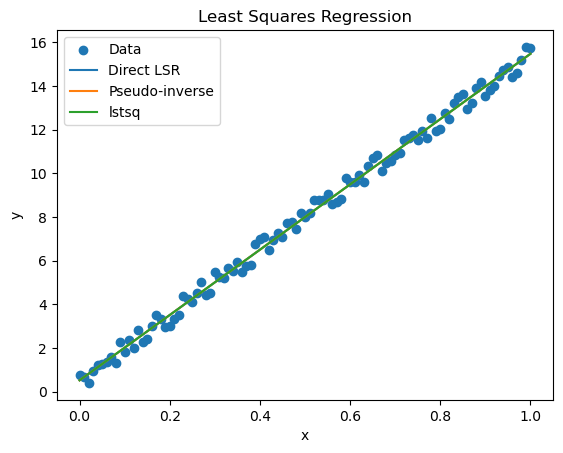

In [52]:
# Plot hasil (Bobot maks: 5%)

# Plot titik-titik data
plt.scatter(x, y, label='Data')

# Plot hasil pendekatan LSR
y_pred_direct = A @ alphaDirect
plt.plot(x, y_pred_direct, label='Direct LSR')

y_pred_pseudo = A @ alphaPseudo
plt.plot(x, y_pred_pseudo, label='Pseudo-inverse')

y_pred_lstsq = A @ alphaLstsq
plt.plot(x, y_pred_lstsq, label='lstsq')

# sajikan plot hasil
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Regression')
plt.legend()
plt.show()

<u><h3>SOAL 4 (Total Bobot: 20%)</h3></u>
<h3>Soal 4 A (Bobot: 10%)</h3>
Buat sebuah definisi fungsi <b>my_lagrange(x, y, X)</b> dimana output Y adalah hasil interpolasi Lagrange dari titik-titik data yang ada di x dan y yang dihitung terhadap data-data di X.<br>
Petunjuk: Gunakan <i>nested for-loop</i>, dimana <i>inner for-loop</i> digunakan untuk menghitung hasil kali dari Lagrange basis polynomial dan <i>outer for-loop</i> digunakan untuk menghitung jumlahan dari Lagrange polynomial. Jangan menggunakan fungsi lagrange yang tersedia di scipy.

In [53]:
# my_lagrange function (Bobot maks: 10%)

# definisi fungsi my_lagrange(x,y,X)
def my_lagrange(x, y, X):
    n = len(x)
    m = len(X)
    Y = np.zeros(m)
    
    for j in range(m):
        for i in range(n):
            L = 1
            for k in range(n):
                if k != i:
                    L *= (X[j]-x[k])/(x[i]-x[k])
            Y[j] += L*y[i]
    
    return Y

<h3>Soal 4 B (Bobot: 10%)</h3>
Dengan menggunakan fungsi yang telah didefinisikan pada Soal 4 A dan titik-titik data dummy yang didefinisikan sebagai berikut<br>
$ x = [0, 2, 4, 6, 8] $<br>
$ y = [3, 8, 4, 0, 2] $<br>
X adalah nilai-nilai di sumbu X mulai dari titik awal x hingga titik akhir x yang dibagi menjadi 100 bagian sama panjang<br>
Sajikan plot tiap titik data dan interpolasi Lagrange yang dihasilkan!

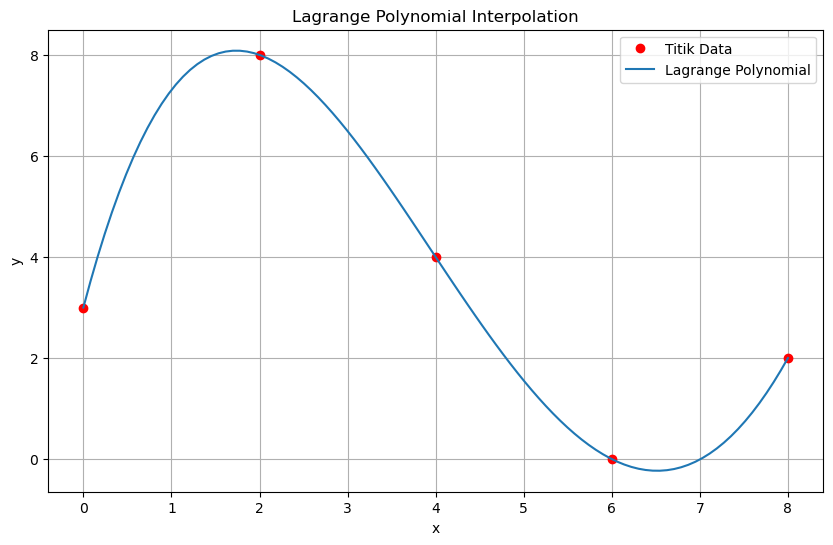

In [54]:
from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt

# bangun titik-titik data x, y, dan X (Bobot: 5%)
x = [0, 2, 4, 6, 8]
y = [3, 8, 4, 0, 2]

f = lagrange(x, y)

# Plot hasil (Boboy maks: 5%)
# Generate x values for plotting
x_plot = np.linspace(min(x), max(x), 100)

fig = plt.figure(figsize=(10, 6))

# Plot titik data
plt.plot(x, y, 'ro', label='Titik Data')

# Plot Lagrange polynomial
plt.plot(x_plot, f(x_plot), label='Lagrange Polynomial')

plt.title('Lagrange Polynomial Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

